In [ ]:
!pip install pandas networkx matplotlib

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# CSV dosyasını oku
df = pd.read_csv('/content/FakeNewsNetPolitifact.csv')

#sütun başlıklarını alalım
df.head()


,title,news_url,source_domain,tweet_num,real
0,Statement from FDA Commissioner Scott Gottlieb...,https://www.fda.gov/NewsEvents/Newsroom/PressA...,NaN,27,0
1,Rand Paul: We Must Demilitarize the Police,http://time.com/3111474/rand-paul-ferguson-pol...,NaN,173,1
2,Clinton Email: We Must Destroy Syria For Israel,http://yournewswire.com/clinton-email-we-must-...,NaN,448,0
3,Food Stamp Enrollment Drops by Four Million in...,http://www.breitbart.com/big-government/2018/0...,NaN,378,0
4,"McCain touts 'Gang of 14,' immigration reform",http://politicalticker.blogs.cnn.com/2008/05/0...,NaN,0,1


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24403 (\N{CJK UNIFIED IDEOGRAPH-5F53}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12502 (\N{KATAKANA LETTER BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12525 (\N{KATAKANA LETTER RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12464 (\N{KATAKANA LETTER GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12391 (\N{HIRAGANA LETTER DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packag

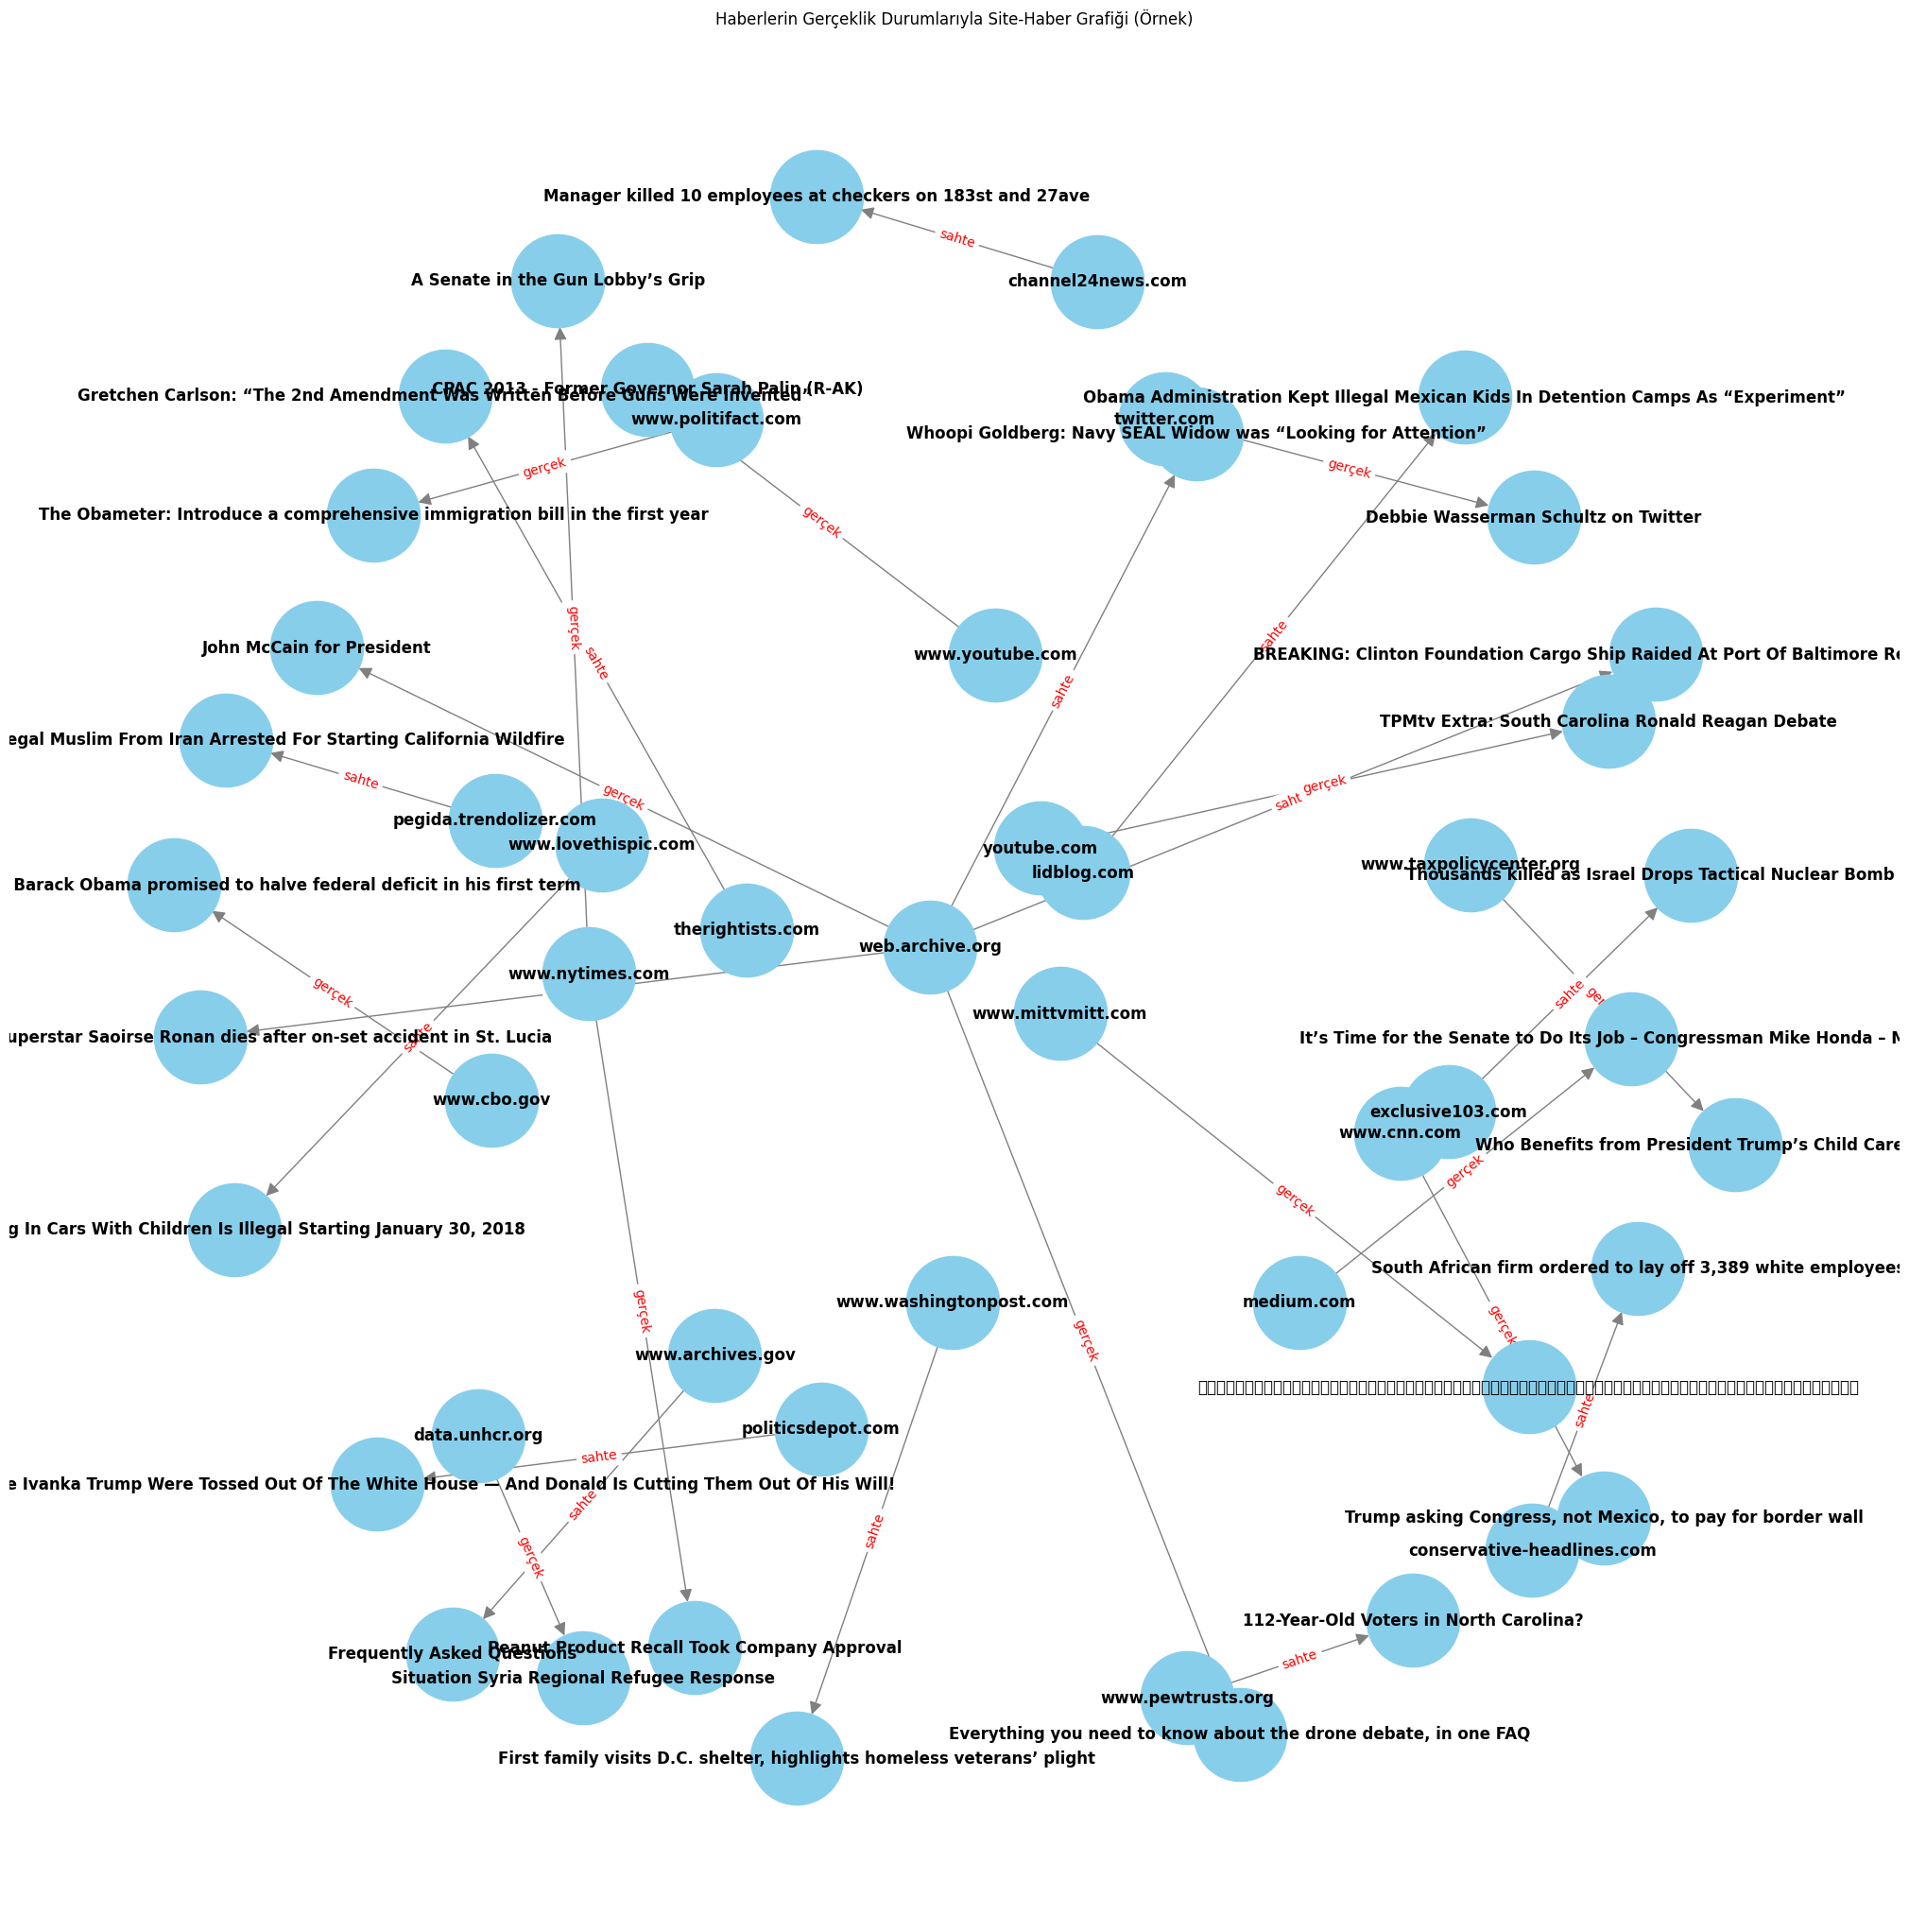

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from urllib.parse import urlparse

# CSV dosyasını oku
df = pd.read_csv('/content/FakeNewsNetPolitifact.csv')  # Dosya yolunu doğru bir şekilde belirtin

# source_domain eksik olan satırlar için news_url'dan alan adını çıkar
df['source_domain'] = df.apply(lambda row: urlparse(row['news_url']).netloc if pd.notna(row['news_url']) and pd.isna(row['source_domain']) else row['source_domain'], axis=1)

# Daha küçük bir örnek veri seti alalım
df_sample = df.sample(n=30, random_state=1)  # 30 satırlık bir örnek

# Grafiği oluştur
G = nx.DiGraph()

# Node'ları ve kenarları ekle
for index, row in df_sample.iterrows():
    parent_node = row['source_domain']
    child_node = row['title']
    edge_label = 'gerçek' if row['real'] == 1 else 'sahte'

    if pd.notna(parent_node):
        G.add_node(parent_node, type='site')
        G.add_node(child_node, type='news')
        G.add_edge(parent_node, child_node, label=edge_label)

# Node'ları konumlandır
pos = nx.spring_layout(G, k=0.5, iterations=50)

# Grafiği çiz
plt.figure(figsize=(20, 20))
nx.draw(G, pos, with_labels=True, node_size=5000, node_color='skyblue', font_size=12, font_weight='bold', arrows=True, arrowsize=20, edge_color='gray')
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.title('Haberlerin Gerçeklik Durumlarıyla Site-Haber Grafiği (Örnek)')
plt.show()
